In [15]:
import pandas as pd
import json
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
import math

In [2]:
# Getting path to the csv files and deciding how many of them to use in dataframe
path = "/Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/"
num_slices = 10000

In [3]:
sorted(Path(path).glob("mpd.*.csv"))[:num_slices]

[PosixPath('/Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.0-999.csv'),
 PosixPath('/Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.1000-1999.csv'),
 PosixPath('/Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.10000-10999.csv'),
 PosixPath('/Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.100000-100999.csv'),
 PosixPath('/Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.101000-101999.csv'),
 PosixPath('/Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.102000-102999.csv'),
 PosixPath('/Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.103000-103999.csv'),
 PosixPath('/Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.104000-104999.csv'),
 PosixPath('/Users/maksym.tseranu/projects/spotify/spo

In [5]:
# Making a single dataframe of all files
csv_files = sorted(Path(path).glob("mpd.*.csv"))[:num_slices]

dfs = []
count_gpt = 0
for file in csv_files: 
    csv_df = pd.read_csv(file, delimiter = ';')
    dfs.append(csv_df)
    count_gpt += 1
    print(f"Processed file number: {count_gpt}")

final_df = pd.concat(dfs, ignore_index=True)
print("Spotify dataset ready")
#print(final_df)

Processed file number: 1
Processed file number: 2
Processed file number: 3
Processed file number: 4
Processed file number: 5
Processed file number: 6
Processed file number: 7
Processed file number: 8
Processed file number: 9
Processed file number: 10
Processed file number: 11
Processed file number: 12
Processed file number: 13
Processed file number: 14
Processed file number: 15
Processed file number: 16
Processed file number: 17
Processed file number: 18
Processed file number: 19
Processed file number: 20
Processed file number: 21
Processed file number: 22
Processed file number: 23
Processed file number: 24
Processed file number: 25
Processed file number: 26
Processed file number: 27
Processed file number: 28
Processed file number: 29
Processed file number: 30
Processed file number: 31
Processed file number: 32
Processed file number: 33
Processed file number: 34
Processed file number: 35
Processed file number: 36
Processed file number: 37
Processed file number: 38
Processed file number

In [7]:
artist_chunk_files = sorted(Path(path).glob("artists_chunk*.csv"))[:num_slices]

artists_dfs = []

# Creating chunk dataset
for chunk in artist_chunk_files: 
    df = pd.read_csv(chunk, delimiter = ';')
    artists_dfs.append(df)
    print(f"Processed chunk number {chunk}")

artists_all_df = pd.concat(artists_dfs, ignore_index = True)

# Creating series with modified id
artist_uri_col = artists_all_df["id"].map("spotify:artist:{}".format)
artist_uri_col = artist_uri_col.rename("artist_uri")

# Adding series with chunks dataframe and removing previous id column
artists_all_df = pd.concat([artists_all_df, artist_uri_col], axis = 1)
artists_all_df = artists_all_df.drop("id", axis = 1)

# Joining chunk dataframe with original
tracks_with_artists_df = final_df.merge(artists_all_df, how = "left", on = "artist_uri")
tracks_with_artists_df


Processed chunk number /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/artists_chunk_1.csv
Processed chunk number /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/artists_chunk_10.csv
Processed chunk number /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/artists_chunk_100.csv
Processed chunk number /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/artists_chunk_1000.csv
Processed chunk number /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/artists_chunk_1001.csv
Processed chunk number /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/artists_chunk_1002.csv
Processed chunk number /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/artists_chunk_1003.csv
Processed chunk number /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/artists_chunk_1004.csv
Processed chunk number

,playlist_id,playlist_name,is_collaborative,modified_at,number_of_tracks,number_of_albums,number_of_followers,track_position,track_name,artist_name,track_uri,artist_uri,album_uri,duration_ms,album_name,artist_followers,artist_genres,artist_popularity
0,0,Throwbacks,False,1493424000,52,47,1,0,Lose Control (feat. Ciara & Fat Man Scoop),Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,2340129,"dance pop,hip hop,hip pop,neo soul,pop rap,r&b...",69.0
1,0,Throwbacks,False,1493424000,52,47,1,0,Lose Control (feat. Ciara & Fat Man Scoop),Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,2340848,"dance pop,hip hop,hip pop,neo soul,pop rap,r&b...",69.0
2,0,Throwbacks,False,1493424000,52,47,1,1,Toxic,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,13250801,"dance pop,pop",78.0
3,0,Throwbacks,False,1493424000,52,47,1,1,Toxic,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,13258936,"dance pop,pop",78.0
4,0,Throwbacks,False,1493424000,52,47,1,1,Toxic,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,13258936,"dance pop,pop",78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75102355,999999,BANDA,False,1433116800,110,57,1,105,La Doble Cara,Banda Carnaval,spotify:track:0PX1p94jkveuUOZ31rjHak,spotify:artist:6LOvxDn71T0wWhCDNcXcUj,spotify:album:4EsRdUztvnblHNgu53aqZr,214706,Las Vueltas De La Vida,2192455,"banda,musica mexicana,norteno",57.0
75102356,999999,BANDA,False,1433116800,110,57,1,106,Adicto a la Tristeza,Edwin Luna y La Trakalosa de Monterrey,spotify:track:3wqJC3yJBN2eSKVuEpQj9w,spotify:artist:4LFOoXhMhnq9U8VsZkSwxl,spotify:album:0zo3LNmIZJr5BeQujgCB2Y,198133,La Banda Grande de la Sultana del Norte,3705045,"banda,musica mexicana,norteno,sad sierreno",65.0
75102357,999999,BANDA,False,1433116800,110,57,1,107,Mi Nombre Entre Tus Dientes (feat. Big Javy),Edwin Luna y La Trakalosa de Monterrey,spotify:track:1YcTGCPO4dRnFWVBvuWEKa,spotify:artist:4LFOoXhMhnq9U8VsZkSwxl,spotify:album:0zo3LNmIZJr5BeQujgCB2Y,208946,La Banda Grande de la Sultana del Norte,3705045,"banda,musica mexicana,norteno,sad sierreno",65.0
75102358,999999,BANDA,False,1433116800,110,57,1,108,Como los Gatos (feat. Xitlali Sarmiento),Edwin Luna y La Trakalosa de Monterrey,spotify:track:0nAyEpfdIFHTXkIISI3Ke7,spotify:artist:4LFOoXhMhnq9U8VsZkSwxl,spotify:album:0zo3LNmIZJr5BeQujgCB2Y,182093,La Banda Grande de la Sultana del Norte,3705045,"banda,musica mexicana,norteno,sad sierreno",65.0


In [8]:
artists_all_df

,artist_followers,artist_genres,artist_popularity,artist_uri
0,13250801,"dance pop,pop",78.0,spotify:artist:26dSoYclwsYLMAKD3tpOr4
1,36372889,"pop,r&b",82.0,spotify:artist:6vWDO969PvNqNYHIOW5v0m
2,13462281,"dance pop,pop",78.0,spotify:artist:31TPClRtHm23RisEBtV3X7
3,2073961,"pop rap,reggae fusion",70.0,spotify:artist:5EvFsr3kj42KNv97ZEnqij
4,10842533,"atl hip hop,contemporary r&b,dance pop,pop,r&b...",78.0,spotify:artist:23zg3TcAtWQy7J6upgbUnj
...,...,...,...,...
291696,lo-fi house,15,NaN,spotify:artist:13299
291697,NaN,1,NaN,spotify:artist:189
291698,NaN,23,NaN,spotify:artist:3282
291699,experimental vocal,13,NaN,spotify:artist:3989


In [9]:
# Making all values in columns numeric
header = tracks_with_artists_df.columns
final_numeric_columns = ["playlist_id", "modified_at", "number_of_tracks", "number_of_albums", "number_of_followers", 
                   "track_position", "duration_ms"]
for column in final_numeric_columns:
    tracks_with_artists_df[column] = pd.to_numeric(tracks_with_artists_df[column])

print(type(final_df["modified_at"][0]))

<class 'numpy.int64'>


In [13]:
# Getting rows by an artist name
tracks_with_artists_df[tracks_with_artists_df["artist_name"] == "Muse"]

,playlist_id,playlist_name,is_collaborative,modified_at,number_of_tracks,number_of_albums,number_of_followers,track_position,track_name,artist_name,track_uri,artist_uri,album_uri,duration_ms,album_name,artist_followers,artist_genres,artist_popularity
3268,45,angst,False,1498521600,76,69,1,68,Uprising,Muse,spotify:track:4VqPOruhp5EdPBeR92t6lQ,spotify:artist:12Chz98pHFMPJEknJQMWvI,spotify:album:0eFHYz8NmK75zSplL5qlfM,304840,The Resistance,7715899,"alternative rock,modern rock,permanent wave,rock",72.0
5199,77,Workout,False,1425081600,24,15,1,1,Survival,Muse,spotify:track:2IFqUmfW8oQoKn6ToxKsMs,spotify:artist:12Chz98pHFMPJEknJQMWvI,spotify:album:3KuXEGcqLcnEYWnn3OEGy0,257466,The 2nd Law,7715899,"alternative rock,modern rock,permanent wave,rock",72.0
5214,77,Workout,False,1425081600,24,15,1,10,Knights Of Cydonia,Muse,spotify:track:7ouMYWpwJ422jRcDASZB7P,spotify:artist:12Chz98pHFMPJEknJQMWvI,spotify:album:0lw68yx3MhKflWFqCsGkIs,366213,Black Holes And Revelations,7715899,"alternative rock,modern rock,permanent wave,rock",72.0
22992,330,electronic,False,1505088000,179,170,1,10,Madness,Muse,spotify:track:0c4IEciLCDdXEhhKxj4ThA,spotify:artist:12Chz98pHFMPJEknJQMWvI,spotify:album:3KuXEGcqLcnEYWnn3OEGy0,281040,The 2nd Law,7715899,"alternative rock,modern rock,permanent wave,rock",72.0
26462,367,Guilty pleasure,False,1499817600,118,85,1,31,Uprising,Muse,spotify:track:4VqPOruhp5EdPBeR92t6lQ,spotify:artist:12Chz98pHFMPJEknJQMWvI,spotify:album:0eFHYz8NmK75zSplL5qlfM,304840,The Resistance,7715899,"alternative rock,modern rock,permanent wave,rock",72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75083782,999736,Good Beats,False,1508371200,143,125,2,26,Madness,Muse,spotify:track:0c4IEciLCDdXEhhKxj4ThA,spotify:artist:12Chz98pHFMPJEknJQMWvI,spotify:album:3KuXEGcqLcnEYWnn3OEGy0,281040,The 2nd Law,7715899,"alternative rock,modern rock,permanent wave,rock",72.0
75083783,999736,Good Beats,False,1508371200,143,125,2,27,Uprising,Muse,spotify:track:4VqPOruhp5EdPBeR92t6lQ,spotify:artist:12Chz98pHFMPJEknJQMWvI,spotify:album:0eFHYz8NmK75zSplL5qlfM,304840,The Resistance,7715899,"alternative rock,modern rock,permanent wave,rock",72.0
75085972,999766,bump,False,1509235200,38,38,1,29,Supermassive Black Hole,Muse,spotify:track:3lPr8ghNDBLc2uZovNyLs9,spotify:artist:12Chz98pHFMPJEknJQMWvI,spotify:album:0lw68yx3MhKflWFqCsGkIs,212439,Black Holes And Revelations,7715899,"alternative rock,modern rock,permanent wave,rock",72.0
75097497,999927,upbeat,False,1486944000,18,17,1,16,Madness,Muse,spotify:track:0c4IEciLCDdXEhhKxj4ThA,spotify:artist:12Chz98pHFMPJEknJQMWvI,spotify:album:3KuXEGcqLcnEYWnn3OEGy0,281040,The 2nd Law,7715899,"alternative rock,modern rock,permanent wave,rock",72.0


In [10]:
tracks_with_artists_df.describe()

,playlist_id,modified_at,number_of_tracks,number_of_albums,number_of_followers,track_position,duration_ms,artist_popularity
count,7.510236e+07,7.510236e+07,7.510236e+07,7.510236e+07,7.510236e+07,7.510236e+07,7.510236e+07,6.684334e+07
mean,5.000083e+05,1.480319e+09,1.097671e+02,7.878736e+01,3.049577e+00,5.423376e+01,2.359914e+05,6.501952e+01
std,2.890299e+05,3.528299e+07,6.295957e+01,4.831610e+01,1.334176e+02,4.811955e+01,1.026741e+05,1.806587e+01
min,0.000000e+00,1.271376e+09,5.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,2.493780e+05,1.465517e+09,5.700000e+01,3.900000e+01,1.000000e+00,1.700000e+01,1.990800e+05,5.700000e+01
50%,4.996670e+05,1.495238e+09,1.000000e+02,7.000000e+01,1.000000e+00,4.000000e+01,2.251330e+05,6.800000e+01
75%,7.507590e+05,1.507075e+09,1.570000e+02,1.110000e+02,2.000000e+00,7.900000e+01,2.589860e+05,7.700000e+01
max,9.999990e+05,1.509494e+09,3.760000e+02,2.440000e+02,7.164300e+04,3.750000e+02,2.074458e+07,1.000000e+02


In [22]:
# Dropping missing values
tracks_with_artists_df.dropna(inplace=True)
print("Dropping missing values is complete")

In [40]:
# Creating Series with most popular songs
most_popular_songs_df = tracks_with_artists_df["track_uri"].value_counts()

print("Most popular songs dataframe is created")
most_popular_songs_df

Most popular songs dataframe is created


track_uri
spotify:track:7oK9VyNzrYvRFo7nQEYkWN    81675
spotify:track:69bp2EbF7Q2rqc5N3ylezZ    78465
spotify:track:0XUfyU2QviPAs6bxSpXYG4    76089
spotify:track:1lzr43nnXAijIGYnCT8M8H    69519
spotify:track:6Knv6wdA0luoMUuuoYi2i1    69210
                                        ...  
spotify:track:4lt5gIEAgnAdEfTAWXRXZu        1
spotify:track:0Fc0SEnH9WljgGxT8iiAQ4        1
spotify:track:48NczHIRCcDt4vatj5BBT8        1
spotify:track:226LY0JLG2ptdbNn1ymBJv        1
spotify:track:72tp9v9hheHKoUNlnV0su8        1
Name: count, Length: 1071983, dtype: int64

In [42]:
# Adding Series column to the tracks dataset
popular_tracks_with_artists_df = tracks_with_artists_df.merge(most_popular_songs_df, how = "left", on = "track_uri")

#Renaming a count column
popular_tracks_with_artists_df = popular_tracks_with_artists_df.rename(columns = {"count": "track_popularity"})
print("Popular dataset is created")
popular_tracks_with_artists_df

Popular dataset is created


,playlist_id,playlist_name,is_collaborative,modified_at,number_of_tracks,number_of_albums,number_of_followers,track_position,track_name,artist_name,track_uri,artist_uri,album_uri,duration_ms,album_name,artist_followers,artist_genres,artist_popularity,track_popularity
0,0,Throwbacks,False,1493424000,52,47,1,0,Lose Control (feat. Ciara & Fat Man Scoop),Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,2340129,"dance pop,hip hop,hip pop,neo soul,pop rap,r&b...",69.0,13682
1,0,Throwbacks,False,1493424000,52,47,1,0,Lose Control (feat. Ciara & Fat Man Scoop),Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,2340848,"dance pop,hip hop,hip pop,neo soul,pop rap,r&b...",69.0,13682
2,0,Throwbacks,False,1493424000,52,47,1,1,Toxic,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,13250801,"dance pop,pop",78.0,39615
3,0,Throwbacks,False,1493424000,52,47,1,1,Toxic,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,13258936,"dance pop,pop",78.0,39615
4,0,Throwbacks,False,1493424000,52,47,1,1,Toxic,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,13258936,"dance pop,pop",78.0,39615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64299103,999999,BANDA,False,1433116800,110,57,1,105,La Doble Cara,Banda Carnaval,spotify:track:0PX1p94jkveuUOZ31rjHak,spotify:artist:6LOvxDn71T0wWhCDNcXcUj,spotify:album:4EsRdUztvnblHNgu53aqZr,214706,Las Vueltas De La Vida,2192455,"banda,musica mexicana,norteno",57.0,277
64299104,999999,BANDA,False,1433116800,110,57,1,106,Adicto a la Tristeza,Edwin Luna y La Trakalosa de Monterrey,spotify:track:3wqJC3yJBN2eSKVuEpQj9w,spotify:artist:4LFOoXhMhnq9U8VsZkSwxl,spotify:album:0zo3LNmIZJr5BeQujgCB2Y,198133,La Banda Grande de la Sultana del Norte,3705045,"banda,musica mexicana,norteno,sad sierreno",65.0,51
64299105,999999,BANDA,False,1433116800,110,57,1,107,Mi Nombre Entre Tus Dientes (feat. Big Javy),Edwin Luna y La Trakalosa de Monterrey,spotify:track:1YcTGCPO4dRnFWVBvuWEKa,spotify:artist:4LFOoXhMhnq9U8VsZkSwxl,spotify:album:0zo3LNmIZJr5BeQujgCB2Y,208946,La Banda Grande de la Sultana del Norte,3705045,"banda,musica mexicana,norteno,sad sierreno",65.0,20
64299106,999999,BANDA,False,1433116800,110,57,1,108,Como los Gatos (feat. Xitlali Sarmiento),Edwin Luna y La Trakalosa de Monterrey,spotify:track:0nAyEpfdIFHTXkIISI3Ke7,spotify:artist:4LFOoXhMhnq9U8VsZkSwxl,spotify:album:0zo3LNmIZJr5BeQujgCB2Y,182093,La Banda Grande de la Sultana del Norte,3705045,"banda,musica mexicana,norteno,sad sierreno",65.0,91


In [43]:
# Creating a sorted by an artist popularity dataframe
sorted_by_popularity = popular_tracks_with_artists_df.sort_values(by=["artist_popularity", "artist_followers", "track_popularity"], ascending=False)
print("Sorted dataframe is created")
sorted_by_popularity

Sorted dataframe is created


,playlist_id,playlist_name,is_collaborative,modified_at,number_of_tracks,number_of_albums,number_of_followers,track_position,track_name,artist_name,track_uri,artist_uri,album_uri,duration_ms,album_name,artist_followers,artist_genres,artist_popularity,track_popularity
1669,29,groovy,False,1506384000,40,39,1,33,Look What You Made Me Do,Taylor Swift,spotify:track:6uFsE1JgZ20EXyU0JQZbUR,spotify:artist:06HL4z0CvFAxyc27GXpf02,spotify:album:7qqYU64i563QXANa6vpkSr,211859,Look What You Made Me Do,92955929,pop,100.0,8230
12510,176,basic,False,1509148800,141,106,1,119,Look What You Made Me Do,Taylor Swift,spotify:track:6uFsE1JgZ20EXyU0JQZbUR,spotify:artist:06HL4z0CvFAxyc27GXpf02,spotify:album:7qqYU64i563QXANa6vpkSr,211859,Look What You Made Me Do,92955929,pop,100.0,8230
12870,182,high,False,1509321600,171,142,5,158,Look What You Made Me Do,Taylor Swift,spotify:track:6uFsE1JgZ20EXyU0JQZbUR,spotify:artist:06HL4z0CvFAxyc27GXpf02,spotify:album:7qqYU64i563QXANa6vpkSr,211859,Look What You Made Me Do,92955929,pop,100.0,8230
13115,185,feelz,False,1508630400,121,109,5,89,Look What You Made Me Do,Taylor Swift,spotify:track:6uFsE1JgZ20EXyU0JQZbUR,spotify:artist:06HL4z0CvFAxyc27GXpf02,spotify:album:7qqYU64i563QXANa6vpkSr,211859,Look What You Made Me Do,92955929,pop,100.0,8230
14304,209,Bus playlist,False,1508889600,52,41,2,50,Look What You Made Me Do,Taylor Swift,spotify:track:6uFsE1JgZ20EXyU0JQZbUR,spotify:artist:06HL4z0CvFAxyc27GXpf02,spotify:album:7qqYU64i563QXANa6vpkSr,211859,Look What You Made Me Do,92955929,pop,100.0,8230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55670106,878989,system,False,1470960000,152,126,1,68,The Long Way,Armour,spotify:track:5i3tY5yQtC6cTFsDzE1NRn,spotify:artist:0Cy2H7k1aO6zFLcHL61uFD,spotify:album:4BIRfnnn4RXRZYSgq6Ufdu,270746,Scientist Launches Dubstep into Outer Space,0,nwothm,0.0,1
57571350,904648,Salsa,False,1508371200,50,48,1,4,Amante A La Antigua,Don Perignon,spotify:track:1xdVdLUgL4KoXkaQ1EXejU,spotify:artist:02PooqAdDkjvfjgunMk8V3,spotify:album:2ij08mQctlwjaXMFFXW493,250800,¡La Buena Vida!,0,salsa puertorriquena,0.0,1
58610834,919745,III,False,1410739200,13,13,2,0,Quiver (feat. Aminah Dastan),Izem,spotify:track:6EyExm6f3eQC78RlxkDykj,spotify:artist:2s7Hu3nFut9f5ON95LTqEO,spotify:album:1VSfT1R7zg0bOvxVMCjTHl,228208,Allo Love: Volume Four,0,indie jazz,0.0,1
61197263,955684,Jazz,False,1466467200,135,79,4,126,Skylark,Yuval Amihai,spotify:track:6suCb7uXVsw3o4eLA34ZNt,spotify:artist:7c4sIyDJ1EHjKMTvF2C7kA,spotify:album:1b6iohKUyvXpmqBQbftjHX,304973,"Longing (feat. Damien Varaillon, Gautier Garri...",0,israeli jazz,0.0,1


In [45]:
# Creating a dataframe with most popular songs of the most popular artists
most_popular_songs_of_artists_df = sorted_by_popularity.drop_duplicates(subset = "artist_name", keep = "first")
print("Dataframe with most popular songs of the most popular artists is created")
most_popular_songs_of_artists_df

Dataframe with most popular songs of the most popular artists is created


,playlist_id,playlist_name,is_collaborative,modified_at,number_of_tracks,number_of_albums,number_of_followers,track_position,track_name,artist_name,track_uri,artist_uri,album_uri,duration_ms,album_name,artist_followers,artist_genres,artist_popularity,track_popularity
1669,29,groovy,False,1506384000,40,39,1,33,Look What You Made Me Do,Taylor Swift,spotify:track:6uFsE1JgZ20EXyU0JQZbUR,spotify:artist:06HL4z0CvFAxyc27GXpf02,spotify:album:7qqYU64i563QXANa6vpkSr,211859,Look What You Made Me Do,92955929,pop,100.0,8230
4680,71,boat,False,1472947200,26,24,1,9,One Dance,Drake,spotify:track:1xznGGDReH1oQq0xzbwXa3,spotify:artist:3TVXtAsR1Inumwj472S9r4,spotify:album:3hARKC8cinq3mZLLAEaBh9,173986,Views,82113019,"canadian hip hop,canadian pop,hip hop,pop rap,rap",95.0,43447
21568,329,trap,False,1509148800,89,70,3,0,Soy Peor,Bad Bunny,spotify:track:5MT96Zz0ymUJNm8obKZQr0,spotify:artist:4q3ewBCX7sLwd24euuV69X,spotify:album:28xYvlMemVAzCBJdJVNqf9,257327,Soy Peor,76777672,"reggaeton,trap latino,urbano latino",95.0,1566
9529,134,Rap/Pop,False,1502841600,233,200,1,147,The Hills,The Weeknd,spotify:track:25khomWgBVamSdKw7hzm3l,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,spotify:album:28ZKQMoNBB0etKXZ97G2SN,242253,Beauty Behind The Madness,74628925,"canadian contemporary r&b,canadian pop,pop",92.0,58018
699,10,abby,False,1509321600,72,60,2,22,goosebumps,Travis Scott,spotify:track:6gBFPUFcJLzWGx4lenP6h2,spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY,spotify:album:42WVQWuf1teDysXiOupIZt,243836,Birds In The Trap Sing McKnight,25148970,"hip hop,rap,slap house",90.0,31106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39416205,651706,water,False,1508976000,7,6,1,0,Grondements Du Volcan De L'ile,Lieven Martens Moana,spotify:track:0wOyLhMNeB7ot4GdswVN93,spotify:artist:2CVVjki4SjpTPJhLv6XJVr,spotify:album:18pb6yCF3TnvYLhdg1jWz2,206586,Idylls,0,"belgian experimental,field recording",0.0,1
50830349,810038,Tipico,False,1506384000,94,56,1,43,Quiero Estar Contigo,Banda Unida,spotify:track:57j5vuymonBli4xBi0zGB9,spotify:artist:0G0EI0pt3clR3AegeZng90,spotify:album:4jxoMbdfL5fmiCcRvvBXbf,206426,Greatest Legends Live (Tipico Live Legends),0,merengue tipico,0.0,1
58610834,919745,III,False,1410739200,13,13,2,0,Quiver (feat. Aminah Dastan),Izem,spotify:track:6EyExm6f3eQC78RlxkDykj,spotify:artist:2s7Hu3nFut9f5ON95LTqEO,spotify:album:1VSfT1R7zg0bOvxVMCjTHl,228208,Allo Love: Volume Four,0,indie jazz,0.0,1
61197263,955684,Jazz,False,1466467200,135,79,4,126,Skylark,Yuval Amihai,spotify:track:6suCb7uXVsw3o4eLA34ZNt,spotify:artist:7c4sIyDJ1EHjKMTvF2C7kA,spotify:album:1b6iohKUyvXpmqBQbftjHX,304973,"Longing (feat. Damien Varaillon, Gautier Garri...",0,israeli jazz,0.0,1


In [1]:
# Creating a list of spotify playlists
import json
import csv
from pathlib import Path

path = "/Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/"

json_files = Path(path).glob("*.json")

playlists = []

for json_path in json_files:
    with open(json_path) as file:
        info = json.load(file)
        playlists += info["playlists"]
    print(f"Processed {json_path}")

print("Playlists have been loaded")

Processed /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.549000-549999.json
Processed /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.613000-613999.json
Processed /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.115000-115999.json
Processed /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.778000-778999.json
Processed /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.290000-290999.json
Processed /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.596000-596999.json
Processed /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.324000-324999.json
Processed /Users/maksym.tseranu/projects/spotify/spotify_million_playlist_dataset/data/mpd.slice.422000-422999.json
Processed /Users/maksym.tseranu/projects/spotify/spotify_million_playlis

In [ ]:
def ndcg_exact(validation_tracks, recommended_tracks):
    validation_set = set(map(lambda track: track["track_uri"], validation_tracks))
    

In [69]:
li = [{"track_uri": "foo", "artist_uri": "xxx"}, {"track_uri": "baz", "artist_uri": "zzz"}]
true_set = set(map(lambda x: x["track_uri"], li))
print(true_set)
recos = ["foo", "y", "z", "xxx"]

dcg = 0
idcg = 0

for i, reco in enumerate(recos):
    rel = 1 if reco in true_set else 0
    dcg += rel / math.log(i + 2, 2)

print(dcg)

if len(true_set) > 0:
    for i, track in enumerate(true_set):
        idcg +=  1 / math.log(i + 2, 2)

print(idcg)

ndcg = dcg / idcg

ndcg

{'foo', 'baz'}
1.0
1.6309297535714573


0.6131471927654585

In [ ]:
#


# Define a function to count model NDCG on a playlist
def playlist_count_model_NDCG(playlist, model):
    playlist_split_index = int(len(input_list) * 0.7)

    predictions_part = playlist[:playlist_split_index]
    NDCG_part = playlist[playlist_split_index:]

    recommendations = model(predictions_part)

    return NDCG

In [10]:
# 

playlist_df = tracks_with_artists_df[["playlist_name", "playlist_id", "number_of_tracks"]].drop_duplicates()
#num_of_tracks_df = num_of_tracks_df.sort_values(["number_of_tracks"])

965

<Axes: xlabel='number_of_tracks', ylabel='Count'>

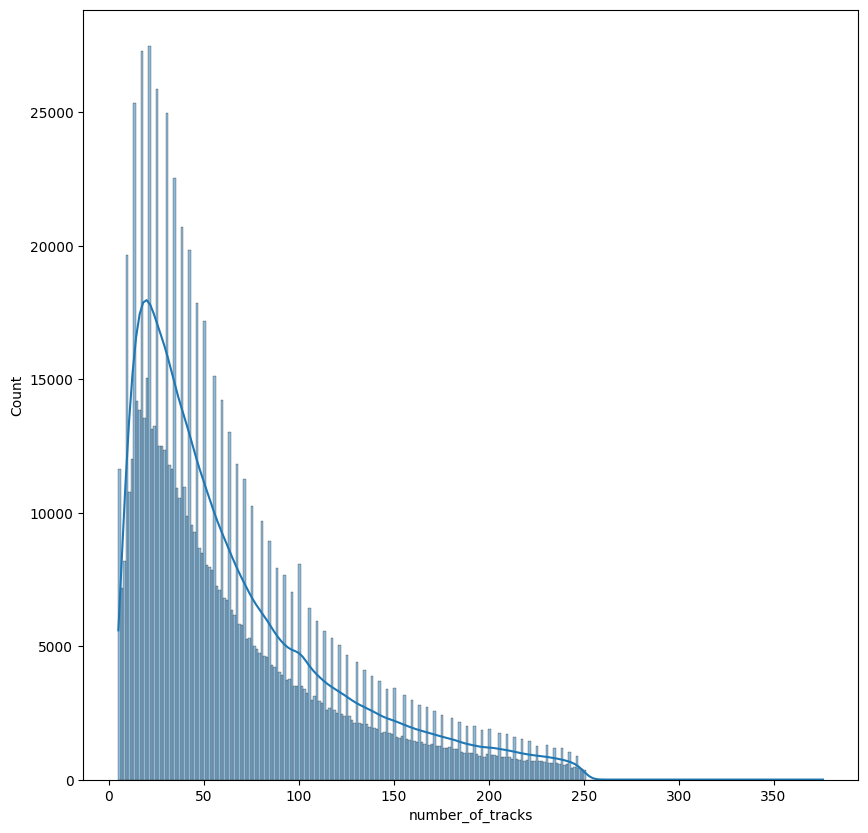

In [11]:
plt.figure(figsize = (10, 10))

sns.histplot(playlist_df["number_of_tracks"], kde = True)

<Axes: xlabel='number_of_tracks', ylabel='Density'>

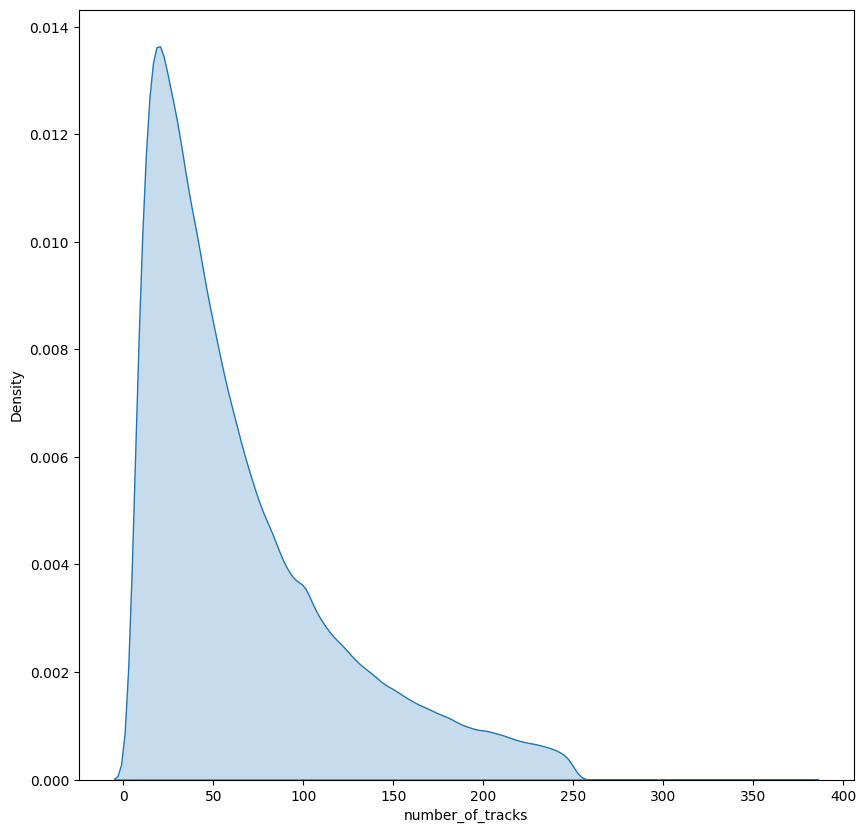

In [21]:
plt.figure(figsize = (10,10))

sns.kdeplot(playlist_df["number_of_tracks"], fill = True)

KeyboardInterrupt: 

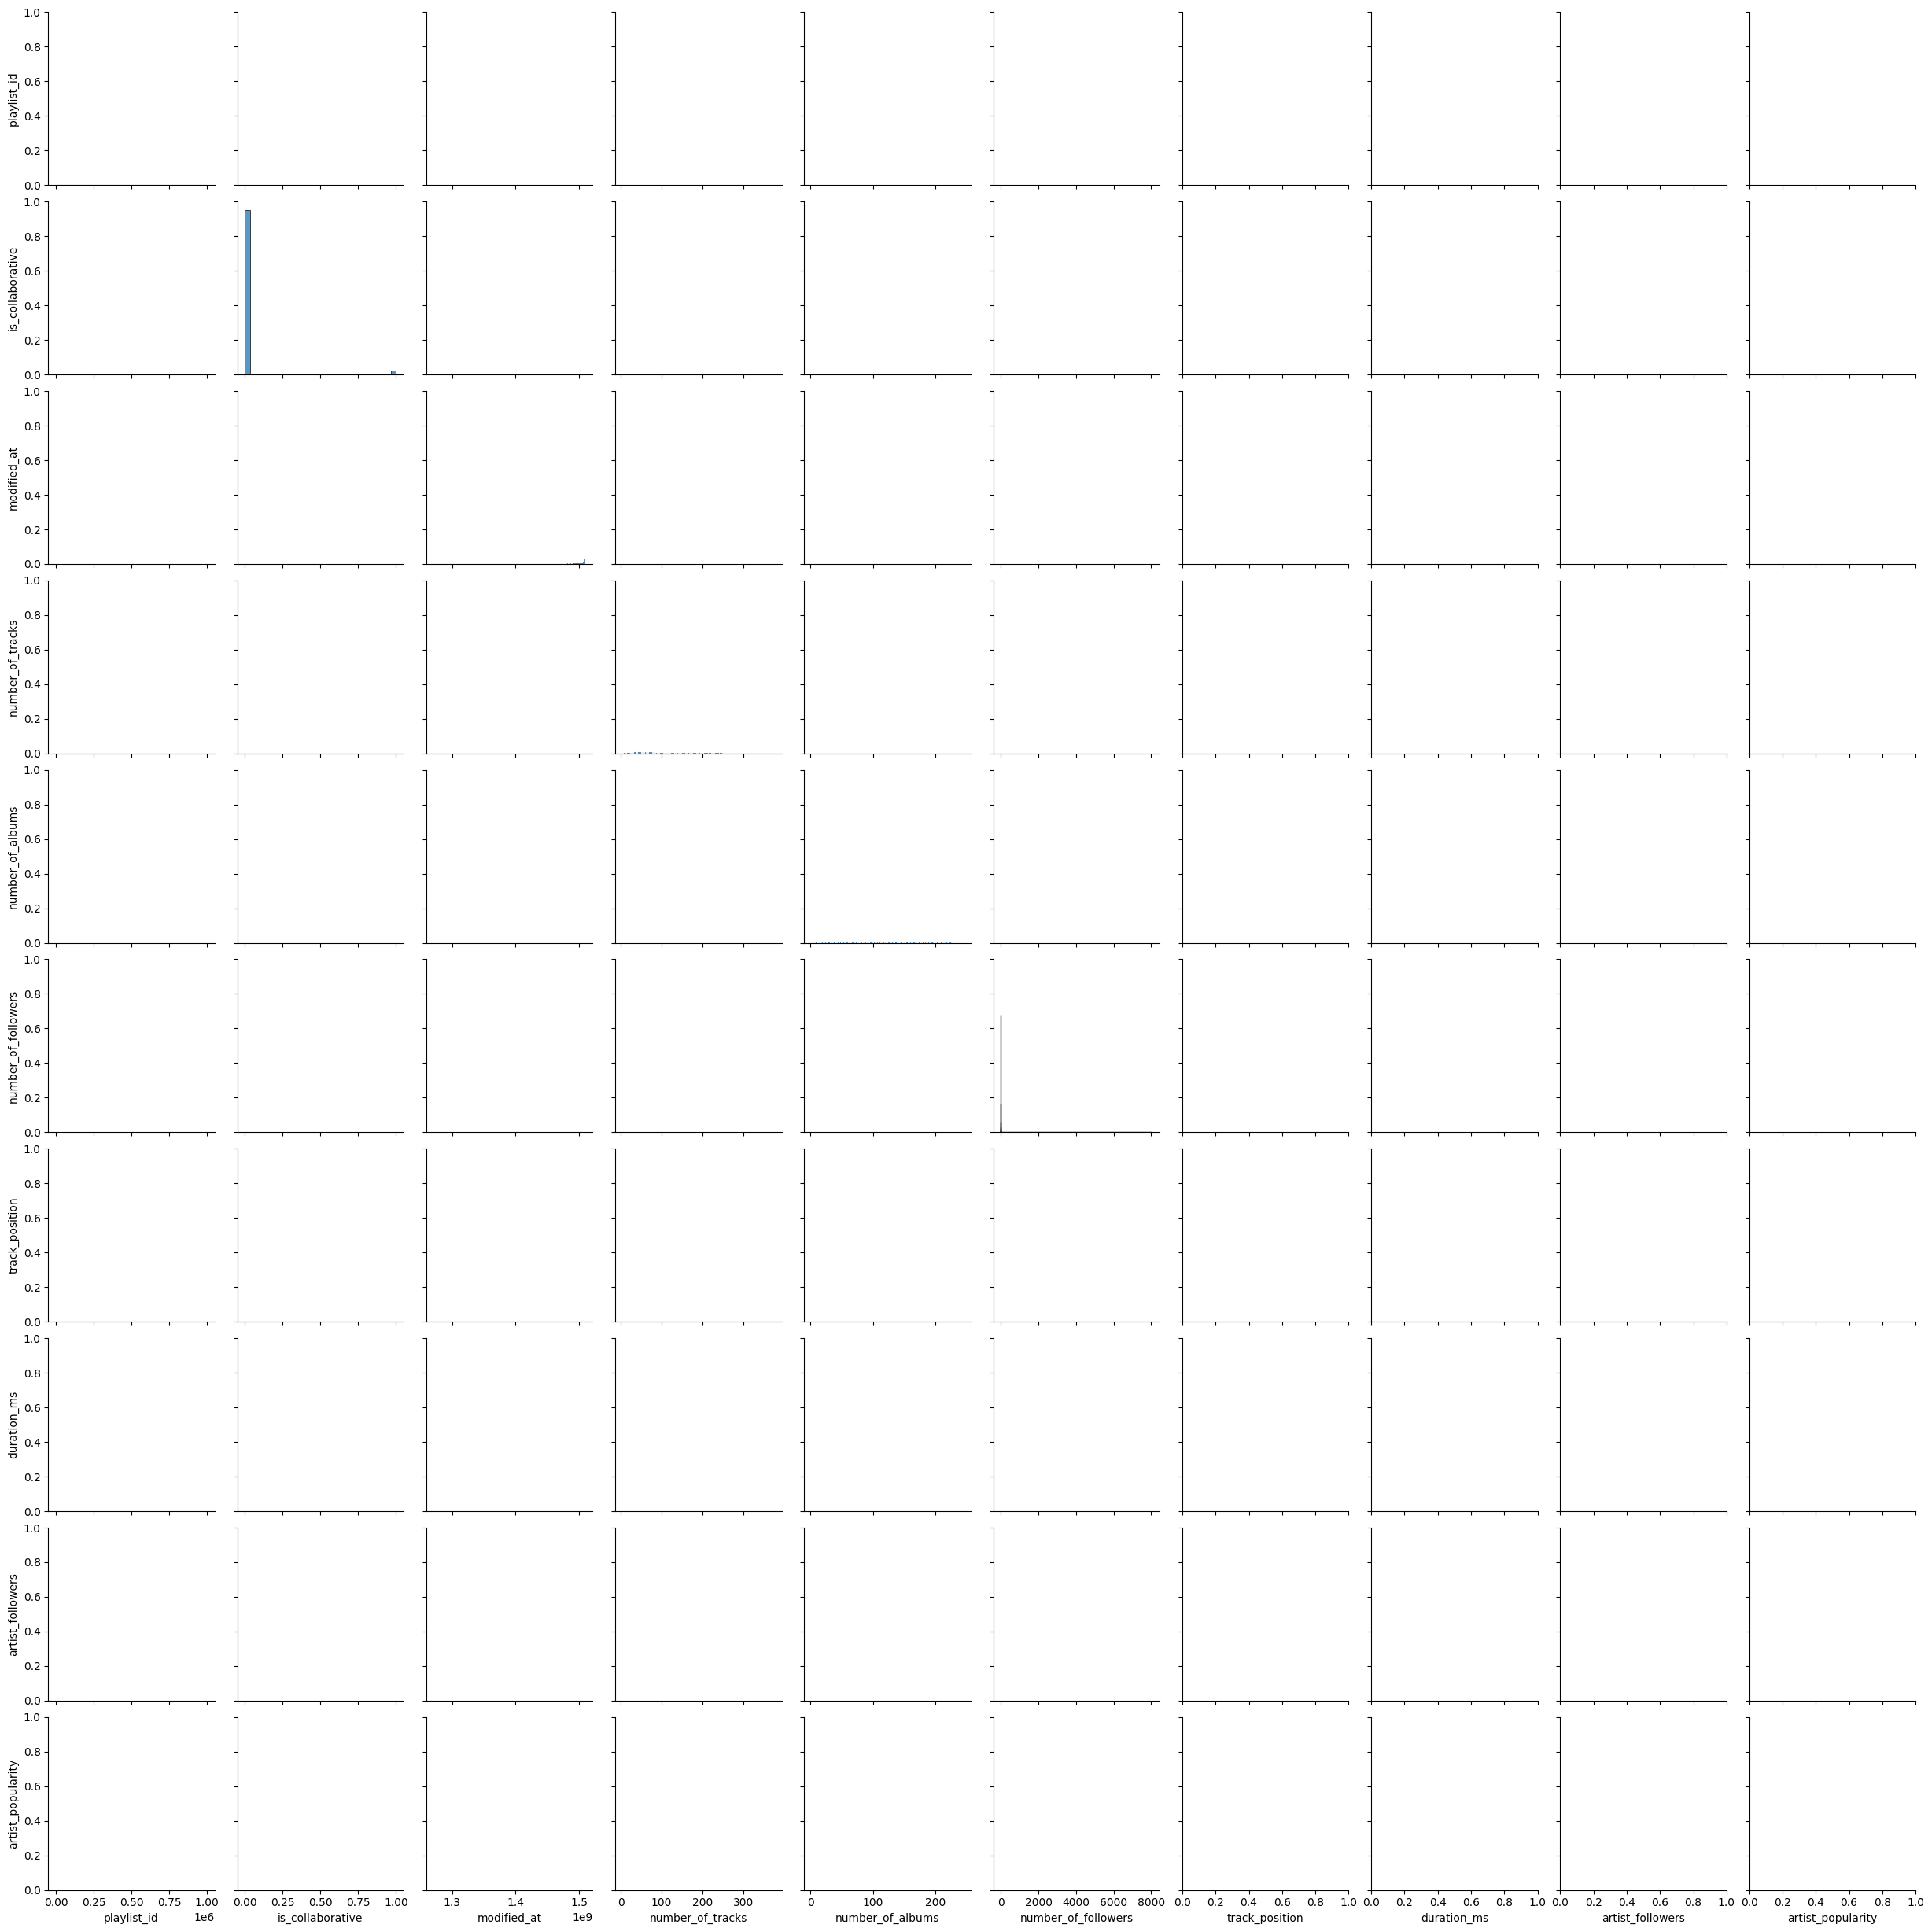

In [22]:
sns.pairplot(tracks_with_artists_df)

<Axes: xlabel='playlist_name', ylabel='number_of_tracks'>

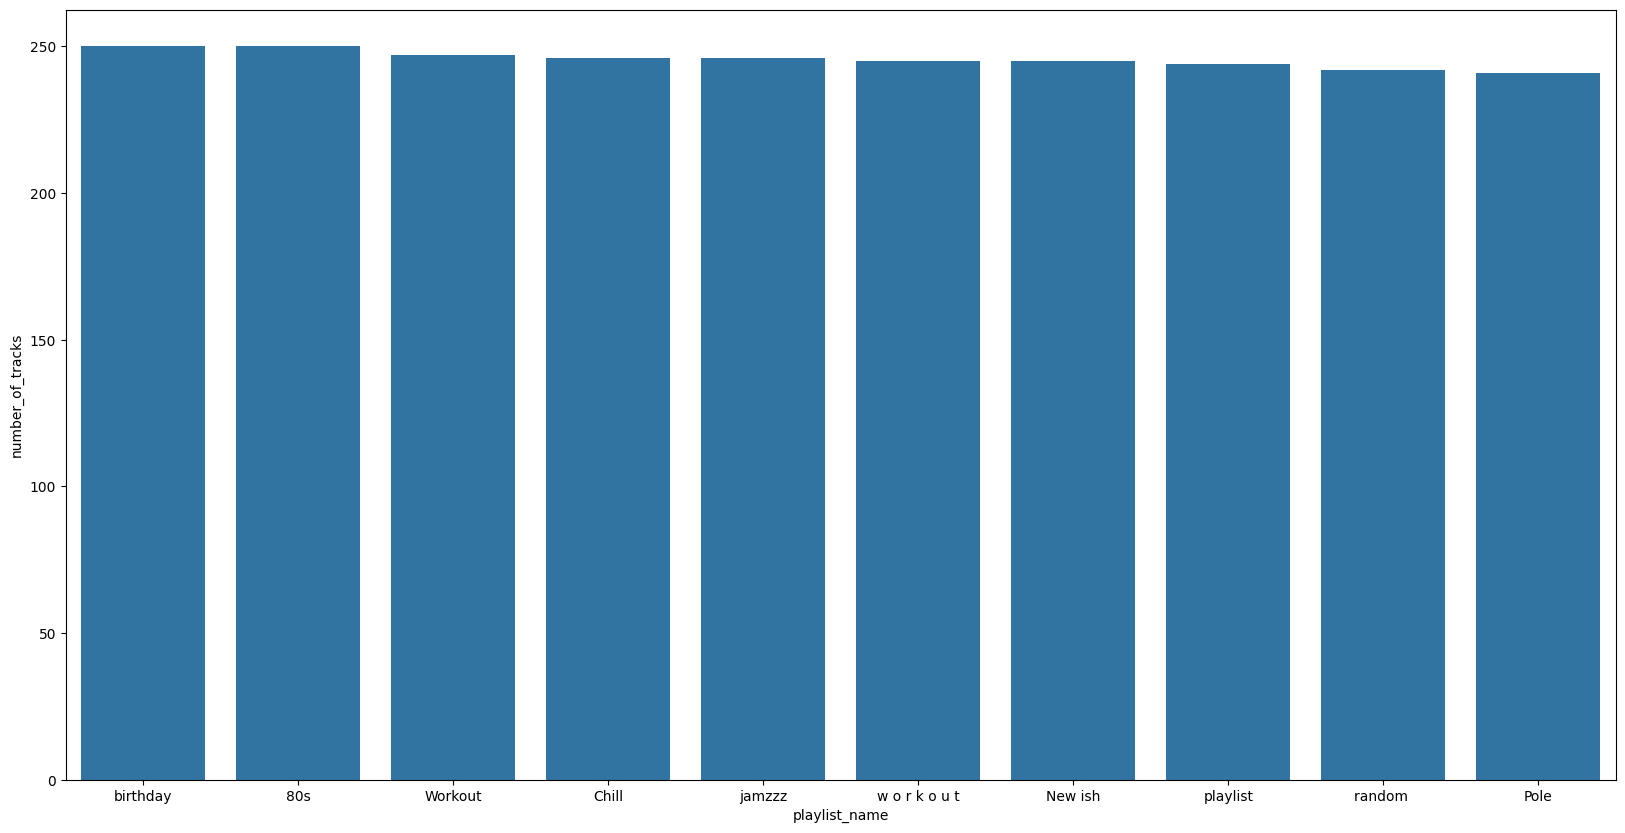

In [251]:
plt.figure(figsize = (20, 10))
large10 = playlist_df.sort_values("number_of_tracks", ascending=False)[:10]

sns.barplot(x = large10["playlist_name"], y = large10["number_of_tracks"])